# week3,4の結果を使って課題を進めていく。
# Sprint1の内容は途中からです。

## 【問題1】コンペティション内容の把握

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- ターゲットは住宅ローンの債務不履行になった人を予測する
- 列名はTARGET
- 企業側のメリットとしては、顧客を審査する際の基準等がわかる。
- 予測結果に影響してきそうなことは、収入、現在の雇用形態、家族の形態、年齢
- 他社の信用情報に傷がついている人

## 【問題2】データの概観

In [1]:
# インポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from matplotlib import cm
pd.options.display.precision = 4
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# データの読み込み
df = pd.read_csv('application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.500,27517.500,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,1.000
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.000,41301.000,...,0,0,0,0,0.000,0.000,0.000,1.000,1.000,2.000
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.000,42075.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.000,33826.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.000,20250.000,...,0,0,0,0,nan,nan,nan,nan,nan,nan


In [3]:
testdf = pd.read_csv('application_test.csv')
testdf

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.000,568800.000,20560.500,450000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
1,100005,Cash loans,M,N,Y,0,99000.000,222768.000,17370.000,180000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,3.000
2,100013,Cash loans,M,Y,Y,0,202500.000,663264.000,69777.000,630000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,4.000
3,100028,Cash loans,F,N,Y,2,315000.000,1575000.000,49018.500,1575000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,3.000
4,100038,Cash loans,M,Y,N,1,180000.000,625500.000,32067.000,625500.000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
5,100042,Cash loans,F,Y,Y,0,270000.000,959688.000,34600.500,810000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,2.000
6,100057,Cash loans,M,Y,Y,2,180000.000,499221.000,22117.500,373500.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
7,100065,Cash loans,M,N,Y,0,166500.000,180000.000,14220.000,180000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,2.000
8,100066,Cash loans,F,N,Y,0,315000.000,364896.000,28957.500,315000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,5.000
9,100067,Cash loans,F,Y,Y,1,162000.000,45000.000,5337.000,45000.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,2.000


In [4]:
# データの概要
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,...,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,...,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,...,0.090,0.024,0.023,0.018,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,-25229.000,-17912.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,-19682.000,-2760.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,-15750.000,-1213.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,-12413.000,-289.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,-7489.000,365243.000,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


In [5]:
# データ型の確認
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
# 欠損値の割合
null_p = pd.DataFrame((df.isnull().sum() /len(df)).sort_values(ascending=False))
null_p.head(50)

,0
COMMONAREA_MEDI,0.699
COMMONAREA_AVG,0.699
COMMONAREA_MODE,0.699
NONLIVINGAPARTMENTS_MODE,0.694
NONLIVINGAPARTMENTS_MEDI,0.694
NONLIVINGAPARTMENTS_AVG,0.694
FONDKAPREMONT_MODE,0.684
LIVINGAPARTMENTS_MEDI,0.684
LIVINGAPARTMENTS_MODE,0.684
LIVINGAPARTMENTS_AVG,0.684


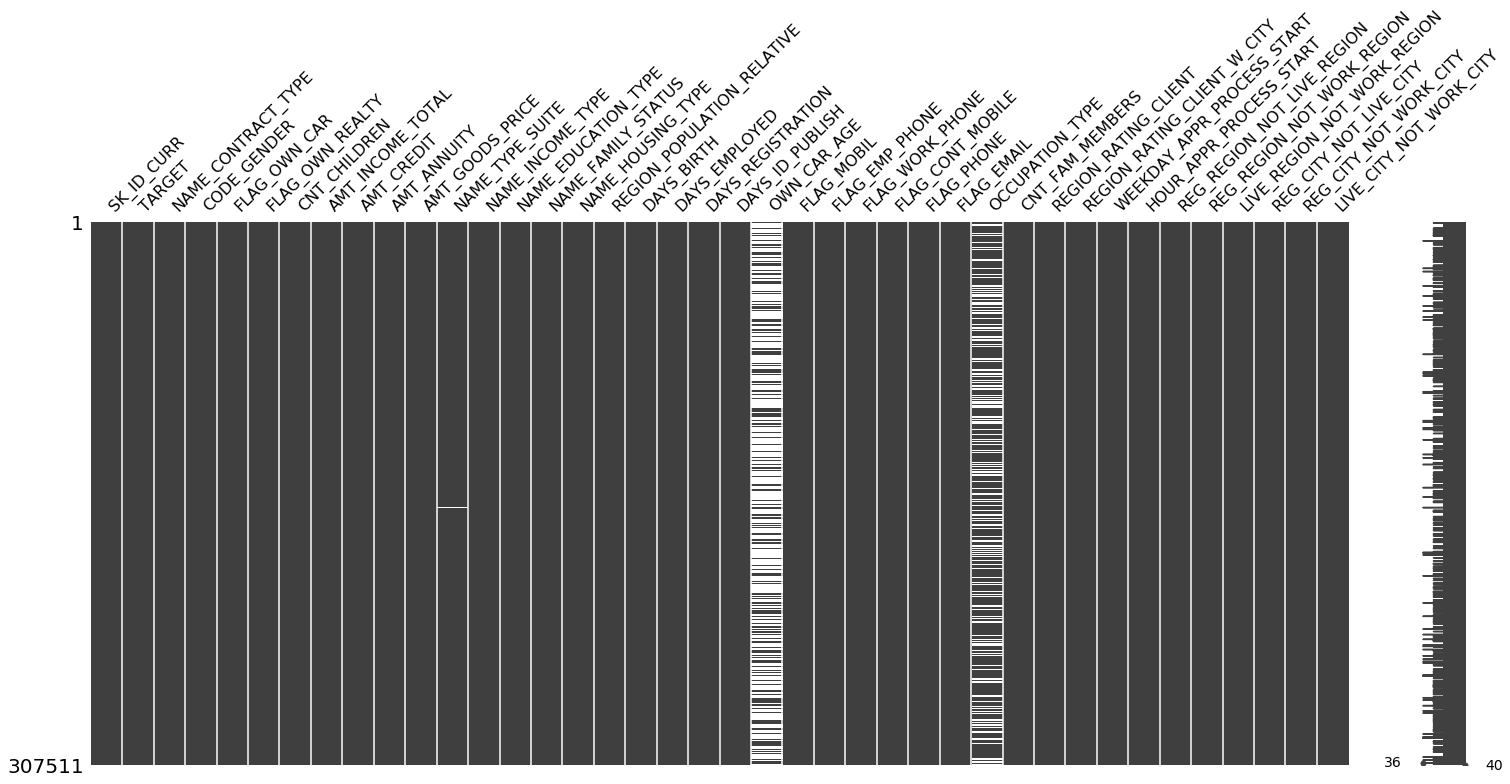

In [7]:
msno.matrix(df.iloc[:,:40])

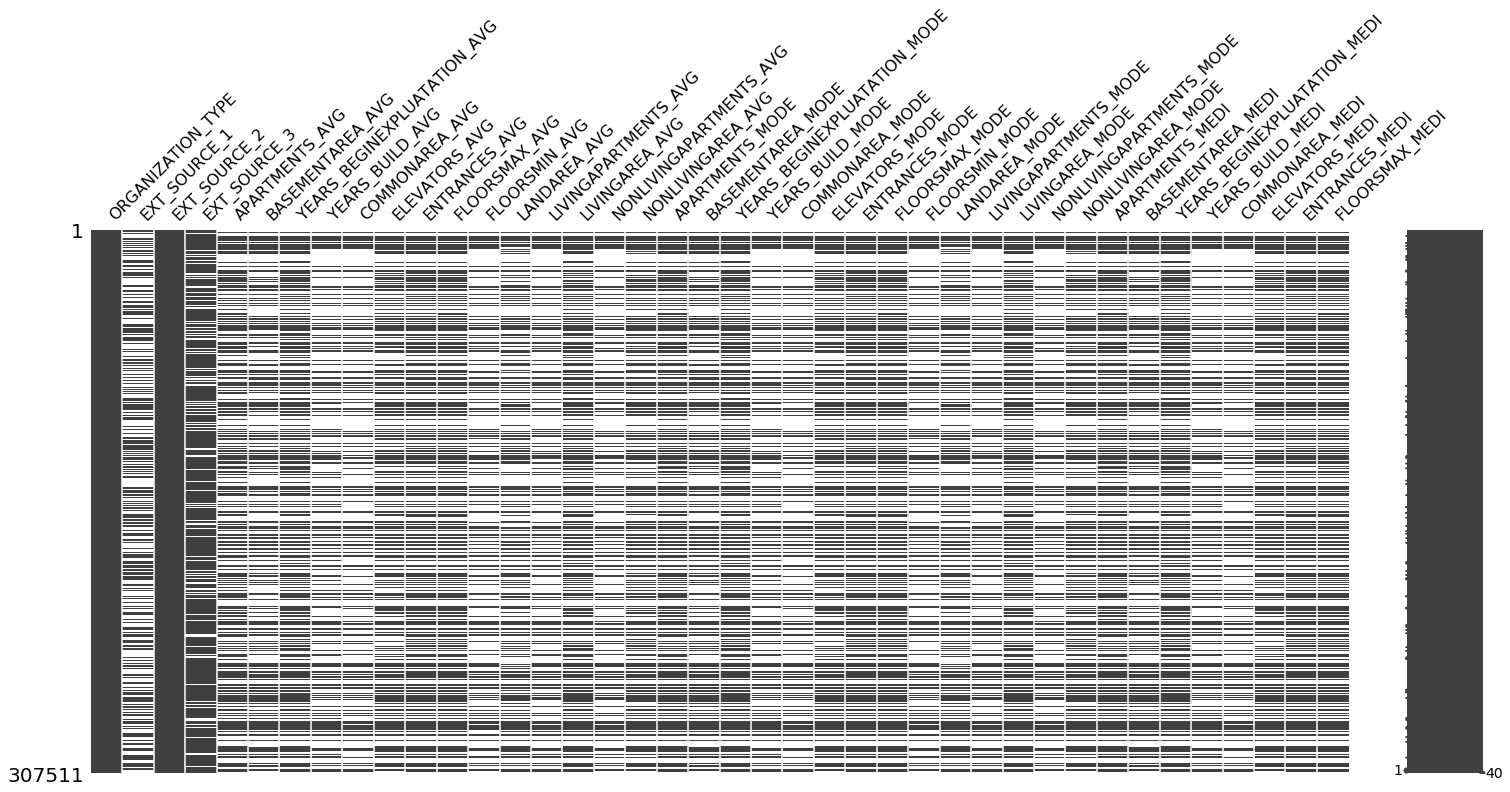

In [8]:
msno.matrix(df.iloc[:,40:80])

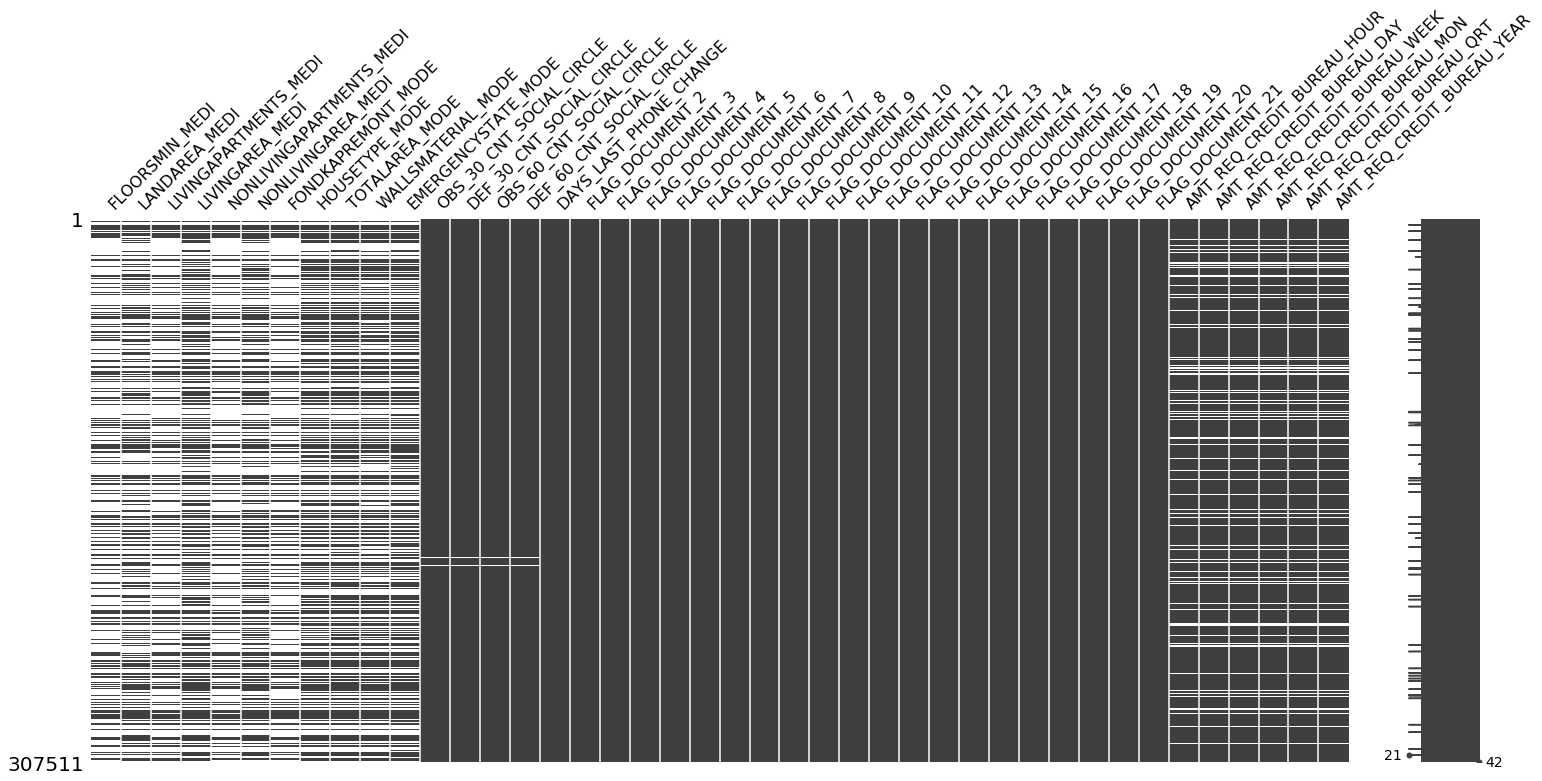

In [9]:
msno.matrix(df.iloc[:,80:])

この時点で
- 30万行と１２０カラム位あってとても多い
- 目的変数は０，１だが０の数が多い。
- 欠損値が多い

等の印象

## week4-session

In [16]:
#ライトブーストですすめる
import lightgbm as lgb

In [17]:
#Xとyに分ける。特徴量は３つに厳選
y = df.TARGET
X = df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

#学習用、検証用データに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
#インスタンス化
#2値分類、不均衡データ、その他はデフォルト
lgbc = lgb.LGBMClassifier(random_state=0,class_weight='balanced',objective='binary')

#学習
lgbc.fit(X_train,y_train,eval_metric='auc')

#予測(確率で)
y_pred = lgbc.predict_proba(X_test)

In [19]:
#テストデータを予測する
submissionX = testdf[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
submission = lgbc.predict_proba(submissionX)[:,1]

#提出用にデータフレーム化
submission = pd.DataFrame({'SK_ID_CURR':testdf.SK_ID_CURR,'TARGET':submission})

In [14]:
#CSVに出力
submission.to_csv('first_sub.csv', index = False)

結果は

private :0.70272

public  :0.71305

6000位辺りだった

## 【問題1】パイプラインの作成

In [20]:
#Xとyに分ける
y = df.TARGET
X = df.drop(['TARGET','SK_ID_CURR'],axis=1)

#ダミー変数へ
X = pd.get_dummies(X,drop_first=True)

#学習用、検証用データに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# num_leaves　葉の数。高いと過学習、低いと未学習
# max_depth 決定木の深さ
parameters = {'num_leaves': range(20, 60, 20),
              'max_depth' : range(3,6)}

clf = GridSearchCV(lgbc, parameters, n_jobs=-1,scoring='roc_auc')

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_

best_clf.fit(X_train,y_train)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=5, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=20,
        objective='binary', random_state=0, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

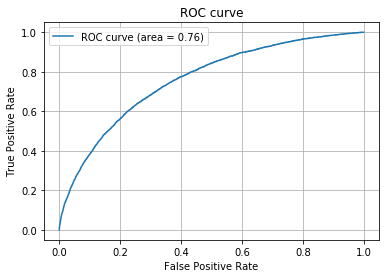

In [21]:
best_pred = best_clf.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, best_pred[:,1])

# ついでにAUCも
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

評価する関数を作成する。

In [22]:
def evaluation(model,X,y):
    """
    訓練済のmodelとX,yを入力すれば、ROC曲線を可視化して、aucを算出してくれる関数
    
    Parameters
    ----------------
    model: 学習済みmodel
    X : ndarrary 説明変数
    y : ndarrary 目的変数 
    Return
    ----------------
    auc
    スコア
    """
    #予測
    pred = model.predict_proba(X)
    
    #fpr,tpr,thressholdsを作成
    fpr, tpr, thresholds = metrics.roc_curve(y, pred[:,1])
    
    #aucを算出
    auc = metrics.auc(fpr, tpr)

    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True) 
    plt.show()
    
    return auc

In [23]:
#提出データを作成する関数を作成
def submission(model,testdf):
    """
    テストデータから提出用データを作成する関数
    
    Parameters
    ----------------
    model: 学習済みmodel
    testdf : テスト用データフレーム
        学習したモデルと同様の変換を行ったあとのデータ
        
    filename: strings
        ファイルネームになる
    
    Return
    ----------------
    submission
    提出用データ
    """
    
    #テストデータを予測する
    submission = model.predict_proba(testdf.drop('SK_ID_CURR',axis=1))[:,1]
    
    #提出用にデータフレーム化
    submission = pd.DataFrame({'SK_ID_CURR':testdf['SK_ID_CURR'],'TARGET':submission})
        
    return submission

# ここからSprint1開始！

# 【問題1】クロスバリデーション

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
#StratifiedKFoldの関数を作成

def run_skf(model,kfold,X,y):
    """
    クロスバリデーションを実行して、スコアの可視化まで行う
    
    Parameters
    ----------------
    kfold : int,分割数
    X : データフレーム
        説明変数
    y : データフレーム
        目的変数
    
    Return
    ----------------
    scores(acc)
    一回毎の成績
    
    mean_score(acc)
    全ての成績の平均
    """
    
    #モデルのインスタンス化
    skf = StratifiedKFold(n_splits=kfold)
    
    #データを分割
    skf.get_n_splits(X,y)
    
    #パラメータの初期値を設定
    fold = 0
    scores = []
    
    #kfoldの回数分をfor文で回す
    #train,testをインデックスにて渡す
    for train_index, test_index in skf.split(X, y):
        # foldカウント
        fold += 1
        
        #インデックスで渡されているので、データに変換してtrain,test,X,yに分割
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        #trainデータを使ってモデルの学習
        model.fit(X_train,y_train)
        
        #自作関数を使ってaucを算出,出力,可視化までする
        score = evaluation(model,X_test,y_test)
        print('Kfold{},auc:{}'.format(fold,score))
        
        #scoresに追加
        scores.append(score)
    
    #平均スコアを算出、出力
    mean_score = np.mean(scores)
    print("Mean Accuracy: {0}".format(mean_score)) 
    return mean_score,scores

デフォルトのlgbを作って検証説明変数は全て使用して、全てダミー変数へ

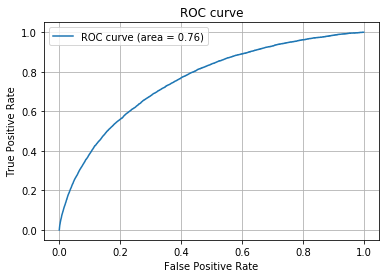

Kfold1,auc:0.7562335839355682


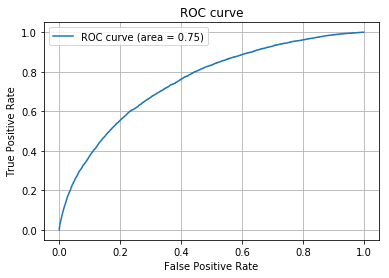

Kfold2,auc:0.7524315600751386


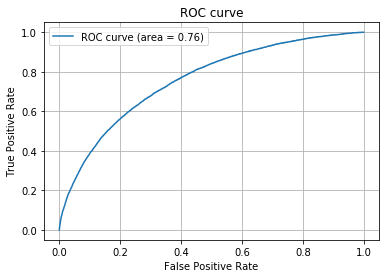

Kfold3,auc:0.7578267651118642
Mean Accuracy: 0.7554973030408569


(0.7554973030408569,
 [0.7562335839355682, 0.7524315600751386, 0.7578267651118642])

In [26]:
#Xとyに分ける
y = df.TARGET
X = df.drop(['TARGET','SK_ID_CURR'],axis=1)

#ダミー変数へ
X = pd.get_dummies(X,drop_first=True)

#ライトブーストをインスタンス化(デフォルト)
lgbc = lgb.LGBMClassifier(random_state=0)

#関数を使って検証
run_skf(lgbc,3,X,y)

# 【問題2】グリッドサーチ

In [27]:
def split(df,target,test_size=0.2):
    """
    データフレームとターゲットを入力すれば、X,y、更に学習データ検証データに分ける関数
    
    Parameters
    ----------------
    df : データフレーム,
    target : string,
    目的変数名''をつけて入力
    test_size : float:0~1
        分割サイズ
    
    Return
    ----------------
    X_train,X_test,y_train,y_test
    """
    
    #Xとyに分ける
    y = df[target]
    X = df.drop('TARGET',axis=1)
    #ダミー変数へ
    X = pd.get_dummies(X,drop_first=True)
    #学習用、検証用データに分ける
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train,X_test,y_train,y_test

In [31]:
def gridlgb(X_train,y_train,X_test,y_test,parameters,score= 'roc_auc',seed=0,cv=3):
    """
    学習データとparameter,score検出方法を入力すればLightgbmを使ってグリッドサーチをして、ベストパラメータを求めて、検証してくれる関数
    
    Parameters
    ----------------
    X_train,y_train,X_test,y_test : ndarrary
    
    parameters : dict:比較したいパラメータ達
    score : string
        評価方法
    seed : ランダムシード
    
    Return
    ----------------
    best_clf
    """
    #ライトブーストのインスタンス化
    #2値分類、不均衡データ、その他はデフォルト
    lgbc = lgb.LGBMClassifier(random_state=seed)
    
    #グリッドサーチのインスタンス化
    clf = GridSearchCV(lgbc, parameters, n_jobs=-1,scoring=score,verbose=1,cv=cv)
    
    #学習
    clf.fit(X_train, y_train)
    
    #ベストパラメータの確認
    best_clf = clf.best_estimator_
    
    #ベストパラメータで再度学習
    best_clf.fit(X_train,y_train)
    
    #ベストパラメータを評価
    evaluation(best_clf,X_test,y_test)
    
    return best_clf


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   54.5s finished


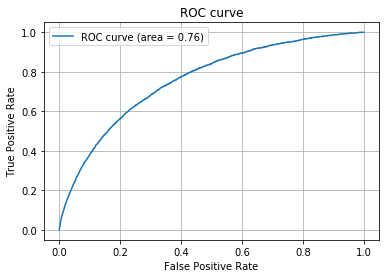

In [29]:
# num_leaves　葉の数。高いと過学習、低いと未学習
# max_depth 決定木の深さ
parameters = {'num_leaves': range(20, 41, 10),
              'n_estimators' : range(10,210,100),
              'objective':['binary'],
              'random_state' :[0]}

#IDを削除したデータを作成
df1 = df.drop('SK_ID_CURR',axis=1)

#関数を使ってデータフレームを分割
X_train,X_test,y_train,y_test = split(df1,'TARGET')

#関数を使ってベストパラメータを調査、評価
model = gridlgb(X_train,y_train,X_test,y_test,parameters)

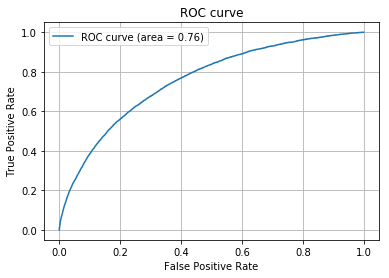

Kfold1,auc:0.7558695097714481


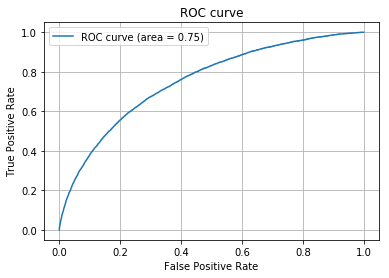

Kfold2,auc:0.7523001735278897


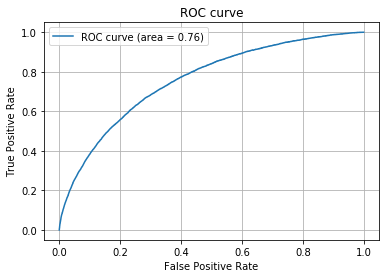

Kfold3,auc:0.7580848034984118
Mean Accuracy: 0.7554181622659165


(0.7554181622659165,
 [0.7558695097714481, 0.7523001735278897, 0.7580848034984118])

In [30]:
#関数を使って検証
run_skf(model,3,X,y)

考察  
①パラメータを指定しないモデル  
CV 0.75549(3回平均)  
②グリッドサーチ後のモデル  
CV 0.75541(3回平均)  

何故か下がった。。。  
とりあえずsubmissionする。

In [34]:
#テストデータを学習時と同様にダミー変数化
testX = pd.get_dummies(testdf,drop_first=True)

submission = submission(model,testX)

ValueError: Number of features of the model must match the input. Model n_features_ is 228 and input n_features is 225 

カラム数が違うよ〜と言ってる。

In [35]:
set(X) ^ set(testX)

{'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'SK_ID_CURR'}

## 学習データにしか存在しないカテゴリ種類があった為モデリングできなかった！

検証データに存在しないカテゴリ種類は削除

In [36]:
df = df[(df['CODE_GENDER'] != 'XNA')&(df['NAME_FAMILY_STATUS'] != 'Unknown')&(df['NAME_INCOME_TYPE'] != 'Maternity leave')].reset_index(drop=True)

気を取り直してやり直し

In [37]:
# デフォルトモデルで提出用ファイル作成

#Xとyに分ける
y = df.TARGET
X = df.drop(['TARGET','SK_ID_CURR'],axis=1)

#ダミー変数へ
X = pd.get_dummies(X,drop_first=True)

#ライトブーストをインスタンス化(デフォルト)
lgbc = lgb.LGBMClassifier(random_state=0)

#全てのデータで学習
lgbc.fit(X,y)

#テストデータを学習時と同様にダミー変数化
testX = pd.get_dummies(testdf,drop_first=True)

#提出用ファイルの作成
defo_sub = submission(lgbc,testX)

#csvファイルへ変換
defo_sub.to_csv('defo_sub.csv', index = False)

In [38]:
# グリッドモデルで提出用ファイルの作成

#グリッド後のハイパーパラメータを取り出してインスタンス化
grid_model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=110, n_jobs=-1, num_leaves=20, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#全てのデータを使って学習
grid_model.fit(X,y)

#提出用ファイルの作成
grid_sub = submission(grid_model,testX)

#csvファイルへ変換
grid_sub.to_csv('grid_sub.csv', index = False)

提出した結果

①lgbのデフォルトモデル  
学習データのCV　0.75549  
Private Score 0.74227  
Public Score  0.74545  

②lgbのグリッドサーチ後のモデル  
学習データのCV 0.75541（↓）  
Private Score 0.74274(↑)  
Public Score  0.74352(↓)  

**考察**  
②グリッドサーチ後のモデルは①何もしないモデルに比べてプライベートスコアは上がったが、パブリック学習データのCVに関しては下がっている。  
もし本番だった場合は①を提出しているはずなので、モデル選択が難しい。  
そもそも学習データからの成績から、プライベート、パブリックスコアともに大きめに成績が下がっているので、  
もう少し正しいCVが必要そうな気がする。  
CVを3回でおこなっているが、5回位で行ったりすればもう少し良い検証が出来るのかも。

# 【問題3】Kernelからの調査

https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

上記カーネルの61行目~70行目辺りがそのまま適用して、いい感じのフィーチャーエンジニアリングになりそう。

- df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'] 
    - 自分の年齢に対しての、働いている期間。
- df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    - ローン残高に対する収入
- df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    - 家族の人数に対する収入
- df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    - 収入に対する支払額
- df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    - ローン残高に対する支払額

それぞれドメイン知識的にも意味ありそう。
検証してみる。

In [39]:
#DAYS_EMPLOYEDの変な数字をnanへ(多分無職の人)
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

#新しい特徴量の作成
#それぞれに間隔的にも意味ありげな特徴
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']


In [40]:
#テストデータも同様に処理
#DAYS_EMPLOYEDの変な数字をnanへ
testdf['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

#新しい特徴量の作成
#それぞれに間隔的にも意味ありげな特徴
testdf['DAYS_EMPLOYED_PERC'] = testdf['DAYS_EMPLOYED'] / testdf['DAYS_BIRTH']
testdf['INCOME_CREDIT_PERC'] = testdf['AMT_INCOME_TOTAL'] / testdf['AMT_CREDIT']
testdf['INCOME_PER_PERSON'] = testdf['AMT_INCOME_TOTAL'] / testdf['CNT_FAM_MEMBERS']
testdf['ANNUITY_INCOME_PERC'] = testdf['AMT_ANNUITY'] / testdf['AMT_INCOME_TOTAL']
testdf['PAYMENT_RATE'] = testdf['AMT_ANNUITY'] / testdf['AMT_CREDIT']


In [41]:
set(df) ^ set(testdf)

{'TARGET'}

特徴量エンジニアリング終了。  

ここから
1. グリッドサーチを使用して再度ベストパラメータの探索
1. ベストモデルで全体を学習
1. テストデータを予測して提出。

特徴量エンジニアリングにより、汎化性能ではなく精度が上がるかを確認する。  
ここで精度がが上がれば、課題４で汎化性能が高いモデルを更に調べる。  
学習データとリーダーボードの成績の差をなくしたい。

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


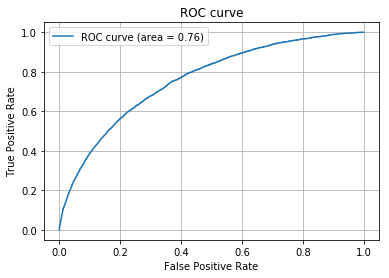

In [42]:
# num_leaves　葉の数。高いと過学習、低いと未学習
# max_depth 決定木の深さ
parameters = {'num_leaves': range(20, 41, 10),
              'n_estimators' : range(10,210,100),
              'objective':['binary'],
              'random_state' :[0]}

#IDを削除したデータを作成
df1 = df.drop('SK_ID_CURR',axis=1)

#関数を使ってデータフレームを分割
X_train,X_test,y_train,y_test = split(df1,'TARGET')

#関数を使ってベストパラメータを調査、評価（少しバリデーションの数を増やしてみた）
model = gridlgb(X_train,y_train,X_test,y_test,parameters,cv=5)

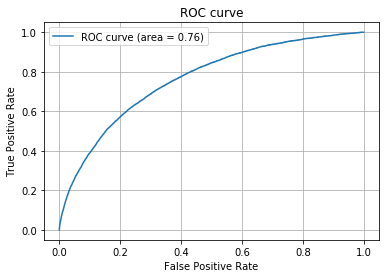

Kfold1,auc:0.762285386622367


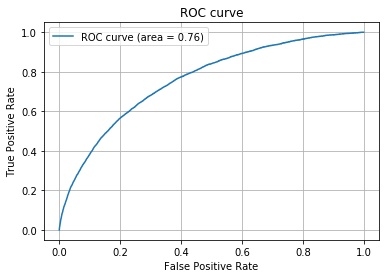

Kfold2,auc:0.7584942301123377


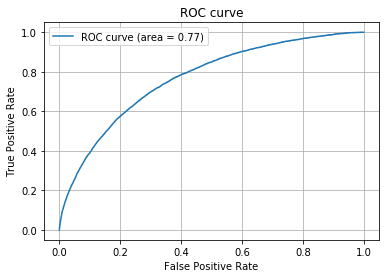

Kfold3,auc:0.7658106226815156
Mean Accuracy: 0.7621967464720735


(0.7621967464720735,
 [0.762285386622367, 0.7584942301123377, 0.7658106226815156])

In [43]:
# ベストパラメータを全体データ使って検証する。

#Xとyに分ける
y = df.TARGET
X = df.drop(['TARGET','SK_ID_CURR'],axis=1)

#ダミー変数へ
X = pd.get_dummies(X,drop_first=True)

#関数を使って検証
run_skf(model,3,X,y)

考察  
先程の  
②lgbのグリッドサーチ後のモデル  
学習データのCV 0.75541（↓）  
と比較して今回は  
学習データのCV 0.76219（↑）
0.007位上がっている！  
期待出来そう

In [44]:
#テストデータを学習時と同様にダミー変数化
testX = pd.get_dummies(testdf,drop_first=True)

#全てのデータを使って学習
model.fit(X,y)

#提出用ファイルの作成
grid2_sub = submission(model,testX)

#csvファイルへ変換
grid2_sub.to_csv('grid2_sub.csv', index = False)

## 結果
## スコア上昇!!!!

①前回のグリッドモデル  
学習データのCV 0.75541  
Private Score 0.74274  
Public Score  0.74352  

②今回のグリッドモデル  
学習データのCV 0.76219(↑0.007)  
Private Score 0.75682(↑0.014)  
Public Score 0.76064(↑0.017)  

**考察**  
想像以上にスコアが改善された。
精度だけでなく、学習データとテストデータの精度の差が埋まり汎化性能が改善された  
特徴量エンジニアリング以外には、グリッドサーチ時のバリデーションの数を増やしてみたのだが、  
それが功を奏した気がする。  
パラメータ選択の際に平均スコアが高いパラメータが選択されたおかげで汎化性能が高まった！

# 【問題4】高い汎化性能のモデル

これまで学んだことを用いながら汎化性能の高いモデルを作成してください。

今は全体の流れを掴むことを重視し、Sprintの時間内に結果を出すということも意識しましょう。



lgbmの過学習対策として

* 小さいmax_binを使う（初期値255）
* 小さいnum_leavesを使う（初期値31）
* min_data_in_leaf（初期値20）とmin_sum_hessian_in_leaf(初期値1e-3)を使う
* bagging_fraction（初期値1.0）とbagging_freq（初期値0）を使う
* feature_fraction（初期値1.0）で特徴量のサブサンプリングを指定
* 訓練データのレコード数を増やす（可能であれば）
* lambda_l1（初期値0.0）、lambda_l2（初期値0.0）、min_gain_to_split（初期値0.0）で正則化を試す
* max_depth（初期値-1）を指定して決定木が深くならないよう調整する


In [45]:
#課題３のモデル
model.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=110, n_jobs=-1, num_leaves=20, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.5min finished


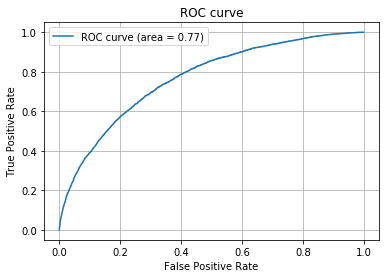

In [46]:
#reg_alpha,reg_lambdaのL1、L2正則化を試してみる。
parameters = {'num_leaves': [20],
              'n_estimators' : [110],
              'objective':['binary'],
              'random_state' :[0],
              'reg_alpha':[0.01,0.1,0.2,0.4,0.7],
              'reg_lambda':[0.01,0.1,0.2,0.4,0.7]}

#IDを削除したデータを作成
df1 = df.drop('SK_ID_CURR',axis=1)

#関数を使ってデータフレームを分割
X_train,X_test,y_train,y_test = split(df1,'TARGET')

#関数を使ってベストパラメータを調査、評価（少しバリデーションの数を増やしてみた）
model = gridlgb(X_train,y_train,X_test,y_test,parameters,cv=5)

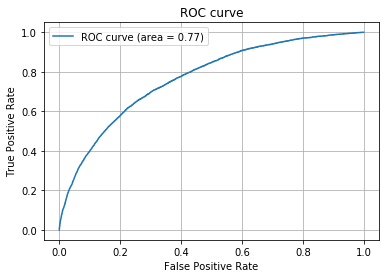

Kfold1,auc:0.7670430241063417


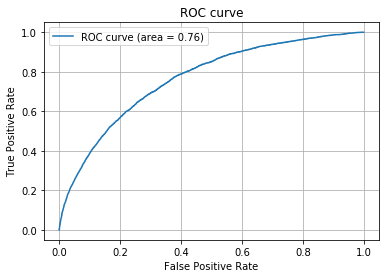

Kfold2,auc:0.7647192260354816


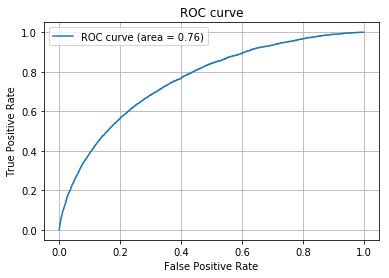

Kfold3,auc:0.7595421563752494


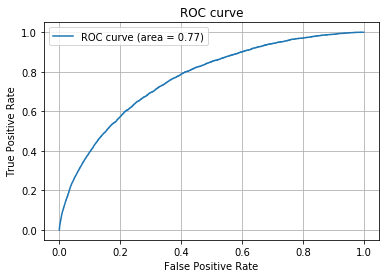

Kfold4,auc:0.7671224253557248


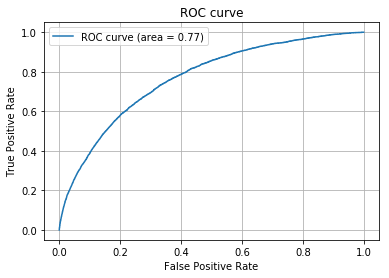

Kfold5,auc:0.7673839207519221
Mean Accuracy: 0.765162150524944


(0.765162150524944,
 [0.7670430241063417,
  0.7647192260354816,
  0.7595421563752494,
  0.7671224253557248,
  0.7673839207519221])

In [47]:
# Xとyに分ける
y = df.TARGET
X = df.drop(['TARGET','SK_ID_CURR'],axis=1)

#ダミー変数へ
X = pd.get_dummies(X,drop_first=True)

#関数を使って検証
run_skf(model,5,X,y)

普通に精度自体が上がった。

In [48]:
model.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=110, n_jobs=-1, num_leaves=20, objective='binary',
        random_state=0, reg_alpha=0.7, reg_lambda=0.7, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [49]:
#テストデータを学習時と同様にダミー変数化
testX = pd.get_dummies(testdf,drop_first=True)

#全てのデータを使って学習
model.fit(X,y)

#提出用ファイルの作成
grid3_sub = submission(model,testX)

#csvファイルへ変換
grid3_sub.to_csv('grid3_sub.csv', index = False)

結果  

①前回のグリッドモデル  
学習データのCV 0.76219
Private Score 0.75682
Public Score 0.76064

②今回のグリッドモデル  
学習データのCV 0.765011(0.003↑)  
Private Score 0.75737(0.0005↑)  
Public Score 0.76232(0.0015↑)

微増。
CVとパブリックスコアは上がってるが、プライベートリーダーボードが微妙に上がらない。

今回前処理後の作業として  

①トレインテスト分割  
②トレインデータを使ってグリッドサーチ  
③ベストパラメータでテストデータの検証  
④ベストパラメータを使って全データのCVでの検証  
⑤全データを使って学習  
⑥サブミッションデータを予測して、サブミッション  

という流れで進めていたが、①、②、③の流れが不要で、④にて全体をグリッドサーチCVをしていたら良かった。  
無駄が多かった。。。